# Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

Data can be found on [kaggle](https://www.kaggle.com/joniarroba/noshowappointments)


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


# Data Wrangling



## General Properties

**Let's first look at the bigger picture of the data we have**

In [45]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Let's assess our data**

In [24]:
# checking the null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.duplicated().sum()

0

**checking the `Gender` column**

In [9]:
df['Gender'].nunique()

2

In [13]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

> column seems to have correct values

**checking the `Scholarship` column**

In [10]:
df['Scholarship'].nunique()

2

In [14]:
df['Scholarship'].unique()

array([0, 1], dtype=int64)

> column seems to have correct values

**checking the `Hipertension` column**

In [11]:
df['Hipertension'].nunique()

2

In [15]:
df['Hipertension'].unique()

array([1, 0], dtype=int64)

> column seems to have correct values

**checking the `Diabetes` column**

In [12]:
df['Diabetes'].nunique()

2

In [16]:
df['Diabetes'].unique()

array([0, 1], dtype=int64)

> column seems to have correct values

**checking the `Alcoholism` column**

In [18]:
# unique values **checking the `Diabetes` column**Alcoholism
df['Alcoholism'].nunique()
> column seems to have correct values

2

In [19]:
# unique values Alcoholism
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

> column seems to have correct values

**checking the `Handcap` column**

In [20]:
# unique values Handcap
df['Handcap'].nunique()> column seems to have correct values

5

In [21]:
# unique values Handcap
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

> this seems to be **incorrect**,  we will change it into values 0 for 0 and 1 for 1,2,3,4 

**checking the `SMS_received` column**

In [22]:
# unique values SMS_received
df['SMS_received'].nunique()

2

In [23]:
# unique values SMS_received
df['SMS_received'].unique()

array([0, 1], dtype=int64)

> column seems to have correct values

**checking for data types**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> as we can see, some data types need to be modified like `PatientId` to be converted to **int**, also `ScheduledDay` and `AppointmentDay` to be DateTime and cut off time from AppointmentDay and split ScheduledDay into date and time

> also , we need to rename those columns to be more **readable** and to fix some typos

In [28]:
# let's have a statistical look 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> min `age` = -1 ??? hmmmm that's not quite reasonable , we need to drop that

**addidtional observasions**


* we gonna need `age_group` column to help us in our analysis
* also we gonna need `has_disease` column to help us in our analysis
* we won't need `AppointmentID` so we gonna drop them
* add `day` and `month` columns


---
## Cleaning
Let's clean what we have found wrong

In [119]:
# copy of the data set
df_edt = df.copy()
df_edt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [120]:
# removing appointmentID column
df_edt.drop(['AppointmentID'], axis=1, inplace=True)
df_edt.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [144]:
# renaming all columns to fix typos for simple exploration
df_edt.rename(columns={'PatientId':'patient_id','ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'SMS_received': 'received_sms', 'No-show': 'no_show', 'Handcap': 'handicap' }, inplace=True)
df_edt.rename(columns=lambda x: x.lower(), inplace=True)
df_edt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   patient_id       110526 non-null  float64 
 1   gender           110526 non-null  object  
 2   scheduled_day    110526 non-null  object  
 3   appointment_day  110526 non-null  object  
 4   age              110526 non-null  int64   
 5   neighbourhood    110526 non-null  object  
 6   scholarship      110526 non-null  int64   
 7   hipertension     110526 non-null  int64   
 8   diabetes         110526 non-null  int64   
 9   alcoholism       110526 non-null  int64   
 10  handicap         110526 non-null  int64   
 11  received_sms     110526 non-null  int64   
 12  no_show          110526 non-null  object  
 13  scheduled_time   110526 non-null  object  
 14  age_group        110526 non-null  category
 15  has_disease      110526 non-null  int64   
 16  day              110

**`AppointmentDay` column**

In [122]:
# appointment_day as date
df_edt['appointment_day'] = df_edt['appointment_day'].str.extract('(\d{4}-\d{2}-\d{2})')
df_edt['appointment_day']= pd.to_datetime(df_edt['appointment_day']).dt.date

**Splitting `scheduled_day` into date and time**

In [123]:
# scheduled_day as time
df_edt['scheduled_time'] = pd.to_datetime(df_edt['scheduled_day'].apply(lambda x: x.split("T")[1])).dt.time

In [124]:
# scheduled_day as date
df_edt['scheduled_day'] = pd.to_datetime(df_edt['scheduled_day'].apply(lambda x: x.split("T")[0])).dt.date

In [125]:
df_edt.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,scheduled_time
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23


In [113]:
type(df_edt['scheduled_day'][0])

datetime.date

In [126]:
# cleaning rows wiht Age < 0
df_edt.drop(df.query('Age < 0').index, inplace=True)

In [127]:
# let's check that 
df_edt.query('age < 0')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,scheduled_time


**Let's add `age_group` and `has_disease` columns**

In [128]:
# labels for age_groups

labels_age_group = pd.Series(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '>90'])

# cutting data into bins
df_edt['age_group'] = pd.cut(df_edt['age'], bins=[-1,9,19,29,39,49,59,69,79,89,115], labels=labels_age_group)

# examples of data
df_edt.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,scheduled_time,age_group
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,60-69
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,50-59
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,60-69
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0-9
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,50-59


In [129]:
# aggregating data about illness
df_edt['has_disease'] = df_edt[["hipertension", "diabetes", "alcoholism", "handicap"]].max(axis=1).replace({2:1,3:1,4:1})

In [118]:
df_edt.head()

,patien_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,scheduled_time,age_group,has_disease
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,60-69,1
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,50-59,0
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,60-69,0
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0-9,0
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,50-59,1


In [130]:
# creating `day` and `month` columns
df_edt['day'] = pd.to_datetime(df_edt['appointment_day']).dt.day_name()

In [131]:
df_edt['month'] = pd.to_datetime(df_edt['appointment_day']).dt.month_name()

In [92]:
df_edt.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,scheduled_time,age_group,has_disease,day,month
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,60-69,1,Friday,April
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,50-59,0,Friday,April
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,60-69,0,Friday,April
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0-9,0,Friday,April
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,50-59,1,Friday,April


In [132]:
# saving the cleaned data

df_edt.to_csv('no_show_appointments_cleaned.csv', index = False)

---
# EDA

In [133]:
dfc = pd.read_csv('no_show_appointments_cleaned.csv')

In [134]:
dfc.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,received_sms,no_show,scheduled_time,age_group,has_disease,day,month
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,60-69,1,Friday,April
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,50-59,0,Friday,April
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,60-69,0,Friday,April
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0-9,0,Friday,April
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,50-59,1,Friday,April


**Let's see if there any specific gender who is not showing up for the appointment**

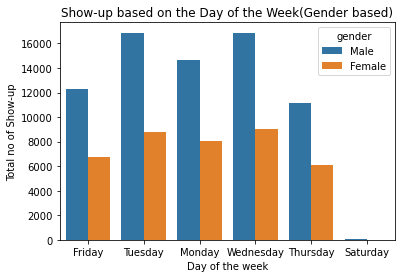

In [135]:
dfc.groupby('day').count()

sns.countplot(data=dfc, x='day', hue='gender');
plt.legend(['Male','Female'], title='gender');
plt.xlabel('Day of the week')
plt.ylabel('Total no of Show-up')
plt.title('Show-up based on the Day of the Week(Gender based)');

> we can clearly see the male patients are higher in number through out the week in comparison to female patients.

---
**Let's see if recieving a SMS can decrease the proportion of patients not showing up**

In [186]:
print(dfc.groupby('received_sms').count())

              patient_id  gender  scheduled_day  appointment_day    age  \
received_sms                                                              
0                  75044   75044          75044            75044  75044   
1                  35482   35482          35482            35482  35482   

              neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
received_sms                                                                   
0                     75044        75044         75044     75044       75044   
1                     35482        35482         35482     35482       35482   

              handicap  no_show  scheduled_time  age_group  has_disease  \
received_sms                                                              
0                75044    75044           75044      75044        75044   
1                35482    35482           35482      35482        35482   

                day  month  
received_sms                
0             75044

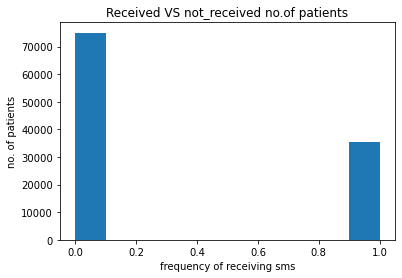

In [188]:
plt.hist(dfc['received_sms'])
plt.xlabel('frequency of receiving sms')
plt.ylabel('no. of patients')
plt.title('Received VS not_received no.of patients');

> It's clear that alot of patients didn't receive SMS

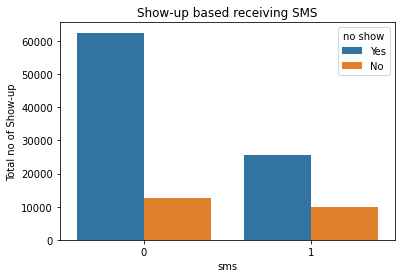

In [106]:
dfc.groupby('received_sms').count()

sns.countplot(data=dfc, x='received_sms', hue='no_show');
plt.legend(['Yes','No'], title='no show');
plt.xlabel('sms')
plt.ylabel('Total no of Show-up')
plt.title('Show-up based receiving SMS');

> hmmmm , surprisingly, individuals who received an SMS reminder did not appear any more frequently than those who did not. No-shows are much lower in the group that did not receive a reminder.

---
**Let's see if there is a relation between the neighbourhood and showing up for the appointemnt**

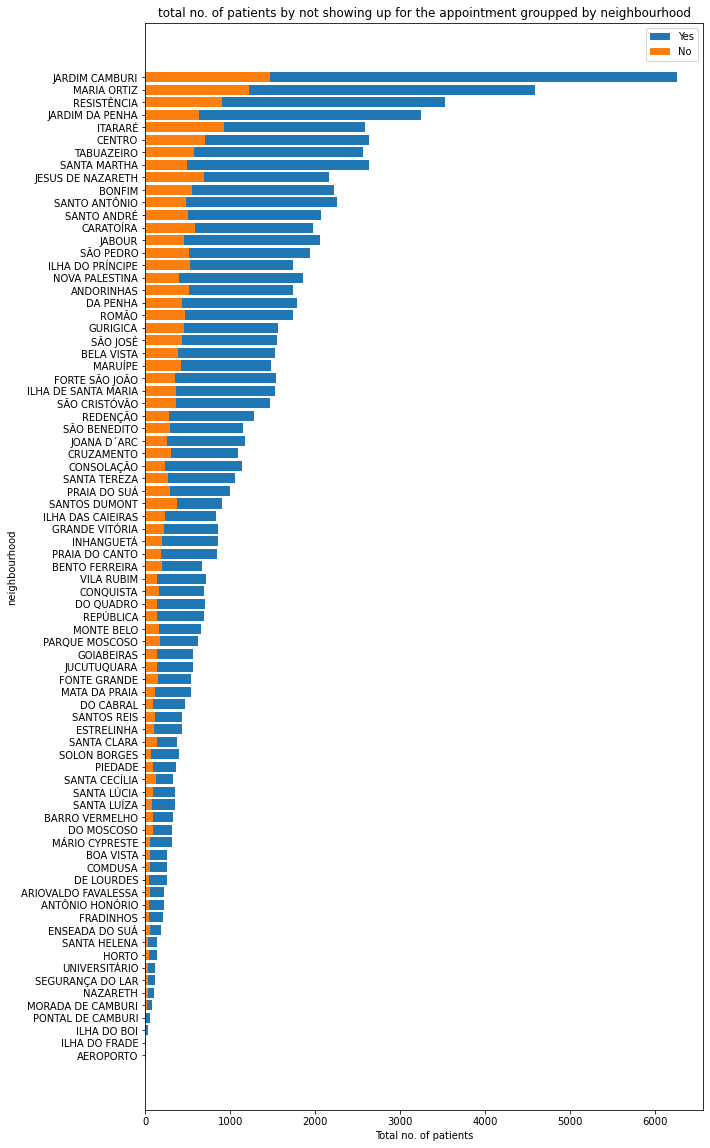

In [140]:
neighborhood_groupped = dfc.groupby(['neighbourhood', 'no_show']).count().unstack().patient_idb
neighborhood_groupped["sum"] = neighborhood_groupped['No'] + neighborhood_groupped['Yes']
neighborhood_groupped.sort_values(by="sum", inplace=True)
neighborhood_groupped.dropna(inplace=True)

# plotting our data
plt.figure(figsize=(10, 20))

# bar chart
plt.barh(neighborhood_groupped.index, neighborhood_groupped['No'].values)
plt.barh(neighborhood_groupped.index, neighborhood_groupped['Yes'].values)

# configs
plt.xlabel("Total no. of patients")
plt.ylabel("neighbourhood")
plt.legend(["Yes", "No"])

plt.title("total no. of patients by not showing up for the appointment groupped by neighbourhood")

plt.show();

> It appears that the place 'JARDIM CAMBURI' is the pioneer on it, with almost 1400 ommited visits.

---
**Let's see if age group is associated with "no-show" visits**

In [168]:
# names of bins with age_group

grp_list = dfc["age_group"].unique()

# no-show data subset
df_edt_no_show = dfc.query('no_show== "Yes"')

# list for proportions of no-show visits
proportion_list = []

# counting proportions for each age_group
for x in grp_list:
    txt = 'age_group == {}'.format(x)
    lba_total = dfc[dfc["age_group"]=='{}'.format(x)]['patient_id'].count()
    lba_no_show = df_edt_no_show[df_edt_no_show["age_group"]=='{}'.format(x)]['patient_id'].count()
    proportion_list.append(float(lba_no_show/lba_total))
    


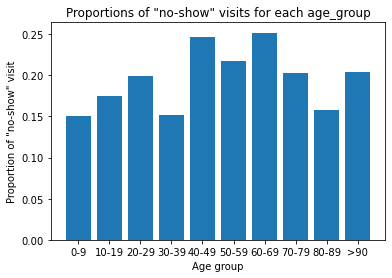

In [169]:
# bars localisations
locations = [1,2,3,4,5,6,7,8,9,10]

# drawing graph
plt.bar(locations, proportion_list, tick_label = np.sort(grp_list))
# graph title and labels
plt.title('Proportions of "no-show" visits for each age_group')
plt.xlabel('Age group')
plt.ylabel('Proportion of "no-show" visit');

> The middle-aged group (40-69) appears to have a higher proportion of 'No-show' visits. However, because this relationship has not been statistically validated, this information is speculative.

---
# Conclusion

Through the EDA phase, I have explored the data to answer questions like:
* **Is there any specific gender who is not showing up for the appointment?**


and found that :
>  the male patients are higher in number through out the week in comparison to female patients.



* **Is recieving a SMS can decrease the proportion of patients not showing up**


and found that :
> surprisingly, individuals who received an SMS reminder did not appear any more frequently than those who did not.


* **Is there a relation between the neighbourhood and showing up for the appointemnt?**


and found that :
> 'JARDIM CAMBURI' is the pioneer on it, with almost 1400 ommited visits.


*  **Is thera a specific age group associated with "no-show" visits?**

and found that :
> The middle-aged group (40-69) appears to have a higher proportion of 'No-show' visits.


-------


**But the limitation I observed was :**


**This project's analysis is based on only half of the year's worth of data. '2015-11-10' and '2016-06-08' are the minimum and maximum values for scheduleDay, respectively. In my perspective, the range is insufficient for use in prediction models because the data may be time-related. It is preferable to build predictive models based on a larger set of data and study the entire year.**